<p>Ben Trey<br>
Project: Capstone Project 1: Exploratory Data Analysis<br>
Data Science Track<br>
2019/10/16<br>
</p>

<p><b>Overview:</b><br>
This project explores the relationship between individualized education and student growth.<br><br>
    
<b>Question 1:</b><br>
Are there variables that are particularly significant in terms of explaining the answer to your project question?<br>
The variables of interest are the homework grades, the lists of problems given to each student, and the difficulty of each problem.<br> 

<b>Question 2:</b><br>
Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?<br>
There is a strong correlation between the problems chosen and the students homework scores. I examined the effect of giving students problems they got wrong in previous homeworks. As each student has a seperate ability that improves when they complete a problem, I suspected reviewing problems a student got wrong in the previous 3 homeworks would improve their score. I discovered giving the students problems with topics they struggled with caused them to learn at a slower rate. At the end of the semester the final homework showed a statistically signifigant difference between the two methods. 

<b>Question 3:</b><br>
What are the most appropriate tests to use to analyse these relationships?<br>
To test the statistical signifigance between the means of the data sets I used the bootstrap method. 
</p>

<h1>Simulation Code</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import sys
from tqdm import tqdm_notebook as tqdm

In [126]:
directory='/mnt/c/users/我的电脑/desktop/springboard/capstone'

#This class will simulate a students performance 
class Student:
    def __init__(self, school_quality, email):
        #ability represents a student's baseline math skills
        #intelligence represents a student's potential for growth
        #motivation represents a student's motivation for growth 
        #consistency represents a student's consistency in performance
        self.email = email
        self.ability = school_quality - 1.0 + 2.0*np.random.random()
        self.intelligence = school_quality - 1.0 + 2.0*np.random.random()
        self.motivation = school_quality - 1.0 + 2.0*np.random.random()
        self.consistency = school_quality - 1.0 + 2.0*np.random.random()
        self.topics={}
        self.C_list=[1.0,1.0,1.0]
        
    #problemUpdate updates the student's math ability after a correct problem    
    def problem_update(self, correct, topic, old_topic, difficulty):
        if not topic in self.topics:
            self.topics[str(topic)]=-1.0+2.0*np.random.random()
        if not old_topic in self.topics:
            self.topics[str(old_topic)]=-1.0+2.0*np.random.random()
        if correct:
            #increase intelligence with a certain probability
            #increase consistency with a certain probability
            #increase motivation with a certain probability
            if np.exp(self.ability) / (1+np.exp(self.ability)) > np.random.random():
                self.ability = self.ability + difficulty/100.0
            if np.exp(self.intelligence) / (1+np.exp(self.intelligence)) > np.random.random():
                self.intelligence = self.intelligence + difficulty/1000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) > np.random.random():
                self.consistency = self.consistency + difficulty/1000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) > np.random.random():
                self.motivation = self.motivation + difficulty/100.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) >np.random.random():
                self.topics[topic] = self.topics[topic]+difficulty/100.0
            if np.exp(self.topics[old_topic])/(1+np.exp(self.topics[str(old_topic)])) >np.random.random():
                self.topics[old_topic] = self.topics[old_topic]+difficulty/100.0
        else:
            #decrease ability with a certain probability
            #decrease intelligence with a certain probability
            #decrease consistency with a certain probability
            #decrease motivation with a certain probability
            if np.exp(self.ability)/(1+np.exp(self.ability)) < np.random.random():
                self.math_ability = self.ability - difficulty/ 100.0
            if np.exp(self.intelligence)/(1+np.exp(self.intelligence)) < np.random.random():
                self.intelligence = self.intelligence - difficulty/1000.0
            if np.exp(self.consistency)/(1+np.exp(self.consistency)) < np.random.random():
                self.consistency = self.consistency - difficulty/1000.0
            if np.exp(self.motivation)/(1+np.exp(self.motivation)) < np.random.random():
                self.motivation = self.motivation - difficulty/100.0
            if np.exp(self.topics[topic])/(1+np.exp(self.topics[topic])) < np.random.random():
                self.topics[topic] = self.topics[topic] - difficulty/100.0
            if np.exp(self.topics[old_topic])/(1+np.exp(self.topics[old_topic])) < np.random.random():
                self.topics[old_topic] = self.topics[old_topic] - difficulty/100.0
        
class School:
    def __init__(self,name):
        self.name = name
        self.school_quality=np.random.random()
        self.students = {}

class Homework:
    def __init__(self,number):
        self.number = number
        self.problem_set = []
        self.topics = set()
        
class Problem:
    def __init__(self, topic, old_topic, discipline, difficulty):
        self.topic = str(topic)
        self.old_topic = str(old_topic)
        self.discipline = discipline
        self.difficulty = difficulty

class Student_Profile:
    def __init__(self, real_name, user_name, password, email, school):
        self.real_name = real_name
        self.user_name = user_name
        self.password = password
        self.email = email
        self.school = school 

class Homework_Holder:
    def __init__(self):
        self.homeworks={}

def user_name_creator():
    pre=['dank', 'snarky', 'lunar', 'fiesty', 'fruity', 'spicy', 'spikey', 'slippery', 'sleepy', \
        'spooky', 'blinking', 'burping', 'sugary', 'dark', 'dinky', 'droopy', 'blind', 'hairy', \
        'hip', 'lame', 'fiery']
    fix=['tiger', 'shark', 'wheels', 'nightmare', 'guitar', 'pants', 'cat', 'blinker', 'bum', \
        'bacon', 'stinker', 'stripe', 'horse', 'monkey', 'popeye', 'eyes', 'moves', 'figher', \
        'liner', 'drifter', 'docker']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000))

def password_creator():
    chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890!@#$%^&*'
    password = ''
    while len(password) < 10:
        password += chars[np.random.randint(0,len(chars)-1)]
    return password

def real_name_creator():
    first = ['Abe', 'Michael', 'Blanche', 'Bobby', 'Johnny', 'Ryan', 'Jasmine', 'Sarah', 'Jenny', \
        'Josey', 'Eva', 'Wendy', 'Kelly', 'Wayne', 'Larry', 'Cindy', 'Sunny', 'Yolanda', 'Coco', \
        'Helen', 'Barette', 'Judy', 'Teddy', 'Frank', 'Victor', 'Yvonne', 'Howard', 'Richard', \
        'Angel', 'Harry', 'Sammy', 'Alex', 'Albert', 'David', 'Lester', 'Maddy', 'Patrick', \
        'Holly', 'Dan', 'Matt', 'Violet', 'Skylar', 'Patricia', 'Oscar', 'Edgar', 'Owen', 'Eric', \
        'Grace', 'Amy', 'Otto', 'Gunther', 'Franz', 'Lina', 'Nora','Angela', 'Olivia','Oliver']
    last = ['Zhang', 'Zhu', 'Ma', 'Xu', 'Wang', 'Liu', 'Li', 'Lin', 'Smith', 'Jones', 'Jackson', \
        'James', 'Johnson', 'Oneal', 'Riley', 'Maxwell', 'Baker', 'Lenz', 'Goldstein', 'Feldman', \
        'Rothschild', 'Kruger', 'Lowenstein', 'Young', 'Parker', 'Morgan', 'Barker', 'Dunn', \
        'Bradley' 'Woods', 'Jordan', 'McGrady', 'Austin', 'Hogan', 'McGuiness', 'Park']
    return np.random.choice(first) + ' ' + np.random.choice(last)

def email_creator():
    pre = ['dirty', 'milky', 'fishy', 'slimy', 'used', 'old', 'tired', 'slightly', 'mostly', \
        'found', 'lost', 'new', 'freshy', 'daily', 'buried', 'acient', 'retired', 'deep', 'moist', \
        'dry', 'hot', 'cold', 'folding', 'extra', 'replacement', 'clamy', 'soiled']
    fix = ['bread', 'beans', 'bike', 'tire', 'blanket', 'rug', 'window', 'chrysler', 'jeep', \
        'sub', 'drum', 'snake', 'shoes', 'shirt', 'hat', 'jug', 'shack', 'tide', 'spice', 'cola', \
        'cup', 'skates']
    provider = ['yahoo.com', 'gmail.com', 'outlook.com', 'qq.com', '163.com']
    return np.random.choice(pre) + np.random.choice(fix) + str(np.random.randint(1,1000)) + '@' \
        + np.random.choice(provider)

def get_grade(student,homework_number):
    #get_grade reads the grade from a csv file and returns a score out of 10
    email=student.email
    homework_data_frame=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'.csv')
    student_data_frame=homework_data_frame[homework_data_frame['email']==email]
    points=0
    total=0
    for key in student_data_frame.keys():
        if student_data_frame.iloc[0][key] == 1:
            points+=1
            total+=1
        if student_data_frame.iloc[0][key] == 0:
            total+=1
    return points/total*10

def list_hash(email,number_of_problems,number_to_do):
    problems=[]
    value = hash(email)
    problem_indices = list(range(number_of_problems))
    while len(problems) < number_to_do and len(problem_indices) > 0:
        problems.append(problem_indices.pop(value%len(problem_indices)))
    problems.sort()
    return problems

def logistic(value):
    return 1/(1+np.exp(-value))

def problem_grader(student, problem):
    #get info from problem
    difficulty=problem.difficulty
    topic=problem.topic
    old_topic=problem.old_topic
    #make sure topic and old topic are in the students topics
    if not topic in student.topics.keys():
        student.topics[topic]=-1+2*np.random.random()
    if not old_topic in student.topics.keys():
        student.topics[old_topic]=-1+2*np.random.random()
    #convert from class parameters to actual parameters using the logistic equation
    motivation_parameter = logistic(student.motivation)
    intelligence_parameter = logistic(student.intelligence)
    consistency_parameter = logistic(student.consistency)
    ability_parameter = logistic(student.ability)
    old_topic_parameter= logistic(student.topics[old_topic])
    topic_parameter = logistic(student.topics[topic])
    return (motivation_parameter*intelligence_parameter*topic_parameter*old_topic_parameter*\
            ability_parameter+(np.random.random()-0.5)/100/consistency_parameter) > (difficulty)**5

def data_maker():
    print('making data')
    schools = {}
    students = {}
    homework = {}
    #populate schools dictionary and write csv
    school_names = ['Chandler', 'Ahwatukee', 'Scottsdale', 'Phoenix', 'Dallas', 'Washington D.C.', \
        'Beijing', 'Shanghai', 'Bangkok', 'Mesa']
    file=open(directory+'/hwdata/schools.csv','w+')
    file.write('school_name,school_quality\r\n')
    for name in school_names:
        schools[name]=School(name)
        file.write(name+', '+str(schools[name].school_quality)+'\r\n')
    file.close()
    #populate students and school.students, write student.csv
    file=open(directory+'/hwdata/students.csv','w+')
    file.write('email,ability,intelligence,motivation,consistency\r\n')
    for name in schools.keys():
        number_of_students = 80 + np.random.randint(0,40)
        school_quality = schools[name].school_quality
        for n in range(number_of_students):
            email = email_creator()
            while email in students.keys():
                email = email_creator()
            real_name = real_name_creator()
            user_name = user_name_creator()
            password = password_creator()
            schools[name].students[email]=Student_Profile(real_name, user_name, password, email, \
                name)
            students[email]=Student(school_quality, email)
            file.write(email+','+str(students[email].ability)+','+str(students[email].intelligence)\
                +','+str(students[email].motivation)+','+str(students[email].consistency)+'\r\n')
    file.close()
    #write student info
    file=open(directory+'/hwdata/students_profile.csv','w+')
    file.write('name,user_name,password,email,school_name\r\n')
    for name in schools.keys():
        for email in schools[name].students.keys():
            real_name=schools[name].students[email].real_name
            user_name=schools[name].students[email].user_name
            password=schools[name].students[email].password
            file.write(real_name+','+user_name+','+password+','+email+','+name+'\r\n')
    file.close()
    #populate homework problems
    difficulties= [ [] for n in range(50) ]
    topics=set(['pre1','pre2','pre3','pre4','pre5'])
    for n in range(50):
        homework[n+1] = Homework(n+1)
        number_to_do = 7 + np.random.randint(0,10)
        number_of_problems = 2*number_to_do
        chapter = int(n/5) + 1
        for m in range(number_of_problems):
            topic = str(chapter) + '.' + str(6*n%10 + int(m/6))
            old_topic=random.sample(topics,1)[0]
            homework[n+1].topics.add(topic)
            difficulty = np.random.normal(0.4,0.10)
            difficulties[n].append(topic)
            difficulties[n].append(old_topic)
            difficulties[n].append('none')
            difficulties[n].append(str(difficulty))
            homework[n+1].problem_set.append(Problem(topic, old_topic, 'none', difficulty))
        for topic in homework[n+1].topics:
            topics.add(topic)
    #simulate homework problems
    line='homework_number,number_of_problems_to_do,number_of_problems'
    for n in range(1,35):
        line+=',p'+str(n)+'t,p'+str(n)+'ot,p'+str(n)+'ds,p'+str(n)+'d'
    line+='\r\n'
    homework_info_lines=[line]
    for homework_number in tqdm(range(1,51)):
        file_lines = []
        grade_lines = []
        number_of_problems = len(homework[homework_number].problem_set)
        problems_to_do = int(number_of_problems/2)
        line=str(homework_number) + ',' + str(problems_to_do) + ',' \
            + str(number_of_problems)
        for problem_number in range(number_of_problems):
            topic=homework[homework_number].problem_set[problem_number].topic
            old_topic=homework[homework_number].problem_set[problem_number].old_topic
            discipline=homework[homework_number].problem_set[problem_number].discipline
            difficulty=homework[homework_number].problem_set[problem_number].difficulty
            line+=','+topic+','+old_topic+','+discipline+','+str(difficulty)
        line+='\r\n'
        homework_info_lines.append(line)
        file_columns='email'
        for n in range(number_of_problems):
            file_columns+=(',p'+str(n+1))
        file_columns+='\r\n'
        file_lines.append(file_columns)
        for school_name in schools.keys():
            for email in schools[school_name].students.keys():
                problems_for_student = list_hash(email,number_of_problems,problems_to_do)
                scores = ['2' for n in range(number_of_problems)]
                for index in problems_for_student:
                    topic=homework[homework_number].problem_set[index].topic
                    old_topic=homework[homework_number].problem_set[index].old_topic
                    difficulty=homework[homework_number].problem_set[index].difficulty
                    score=problem_grader(students[email],\
                        homework[homework_number].problem_set[index])
                    students[email].problem_update(score,topic,old_topic,difficulty)
                    #second attempt
                    if score == False:
                        score=problem_grader(students[email],homework[homework_number].problem_set[index])
                        students[email].problem_update(score,topic,old_topic,difficulty)
                    scores[index]=str(int(score))
                grade_lines.append(email+','+','.join(scores)+'\r\n')
                #improving ability based on results
                for index in problems_for_student:
                    students[email].problem_update(scores[index],topic,old_topic,\
                        homework[homework_number].problem_set[index].difficulty)
        while len(grade_lines)>1:
            file_lines.append(grade_lines.pop(np.random.randint(0,len(grade_lines)-1)))
        file_lines.append(grade_lines.pop())
        file = open(directory+'/hwdata/HW' + str(homework_number) + '.csv','w+')
        for line in file_lines:
            file.write(line)
        file.close()
    file=open(directory+'/hwdata/HWS.csv','w+')
    for line in homework_info_lines:
        file.write(line)
    file.close()
    probability_writer()

def probability_writer():
    print('writing probability')
    line1='name'
    line2='name'
    for n in range(1,35):
        line1+=',p'+str(n)
        line2+=',p'+str(n)+'a,p'+str(n)+'c'
    line1+='\r\n'
    line2+='\r\n'
    file_lines1=[line1]
    file_lines2=[line2]
    for homework_number in range(1,51):
        line1='HW'+str(homework_number)
        line2='HW'+str(homework_number)
        data_frame=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'.csv')
        for problem_number in range(1,len(data_frame.keys())):
            right=len(data_frame[data_frame['p'+str(problem_number)]==1])
            total=len(data_frame[data_frame['p'+str(problem_number)]!=2])
            line1+=','+str(right/total)
            line2+=','+str(total)+','+str(right)
        line1+='\r\n'
        line2+='\r\n'
        file_lines1.append(line1)
        file_lines2.append(line2)
    file=open(directory+'/hwdata/HW_Probabilities.csv','w+')
    for line in file_lines1:
        file.write(line)
    file.close()
    file=open(directory+'/hwdata/HW_Problem_History.csv','w+')
    for line in file_lines2:
        file.write(line)
    file.close()

def data_loader():
    schools = {}
    students = {}
    student_profiles={}
    homeworks = {}
    data_frame=pd.read_csv(directory+'/hwdata/schools.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        schools[school_name]=School(school_name)
        schools[school_name].school_quality=data_frame.iloc[n]['school_quality']
    data_frame=pd.read_csv(directory+'/hwdata/students.csv')
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        students[email]=Student(0,email)
        students[email].ability=data_frame.iloc[n]['ability']
        students[email].intelligence=data_frame.iloc[n]['intelligence']
        students[email].motivation=data_frame.iloc[n]['motivation']
        students[email].consistency=data_frame.iloc[n]['consistency']
    data_frame=pd.read_csv(directory+'/hwdata/students_profile.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        email=data_frame.iloc[n]['email']
        schools[school_name].students[email]=students[email]
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        real_name=data_frame.iloc[n]['name']
        user_name=data_frame.iloc[n]['user_name']
        password=data_frame.iloc[n]['password']
        school_name=data_frame.iloc[n]['school_name']
        student_profiles[email]=Student_Profile(real_name,user_name,password,email,school_name)
    data_frame=pd.read_csv(directory+'/hwdata/HWS.csv')
    for n in range(50):
        homeworks['HW'+str(n+1)]=Homework(n+1)
        number_of_problems=data_frame.iloc[n]['number_of_problems']
        for m in range(number_of_problems):
            topic=str(data_frame.iloc[n]['p'+str(m+1)+'t'])
            old_topic=data_frame.iloc[n]['p'+str(m+1)+'t']
            discipline=data_frame.iloc[n]['p'+str(m+1)+'ds']
            difficulty=data_frame.iloc[n]['p'+str(m+1)+'d']
            homeworks['HW'+str(n+1)].topics.add(topic)
            problem=Problem(topic,old_topic,discipline,difficulty)
            homeworks['HW'+str(n+1)].problem_set.append(problem)
    return [schools,students,student_profiles,homeworks]    
    
def just_make_a_graph_data_maker_results():
    grades=[]
    data=data_loader()
    students=data[1]
    homeworks=data[0]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade(students[email],n+1))
    print("mean without a focus on the student's weaknesses",sum(grades)/len(grades))
    plt.hist(grades,bins=20)
    plt.title('Homework Grades Without Focus')
    plt.xlabel('Grades')
    plt.ylabel('Occurences')
    plt.show()
    
def get_grades():
    grades=[]
    data=data_loader()
    students=data[1]
    homeworks=data[0]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade(students[email],n+1))
    return grades

def list_hash_focus(email,number_of_problems,number_to_do,homework_number,homework_data):
    if homework_number<5:
        problems=list_hash(email,number_of_problems,number_to_do)
    else:
        focus_topics=[]
        line=homework_data[homework_data['homework_number']==homework_number]
        possible_problems=list(range(number_of_problems))
        for n in range(homework_number-3,homework_number):
            homework_scores=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'_focus.csv')
            scores=list(homework_scores[homework_scores['email']==email].values[0][1:])
            homework_line=homework_data[homework_data['homework_number']==n]
            for m in range(len(scores)):
                topic=homework_line['p'+str(m+1)+'t'].values[0]
                old_topic=homework_line['p'+str(m+1)+'ot'].values[0]
                if scores[m]==0 and not topic in focus_topics:
                    focus_topics.append(topic)
                if scores[m]==0 and not old_topic in focus_topics:
                    focus_topics.append(old_topic)
        random.seed(42)
        best_score=0
        problems=[]
        for n in range(10**3):
            test_score=0
            test_problems=random.sample(possible_problems,number_to_do)
            for m in range(number_to_do):
                if line['p'+str(test_problems[m]+1)+'ot'].values[0] in focus_topics:
                    test_score+=1
            if test_score >= best_score:
                best_score=test_score
                problems=test_problems
    return problems

def data_maker_focus():
    print('making data')
    data_loaded=data_loader()
    schools=data_loaded[0]
    students=data_loaded[1]
    student_profiles=data_loaded[2]
    homework=data_loaded[3]
    homework_data=pd.read_csv(directory+'/hwdata/HWS.csv')
    #simulate homework problems
    for homework_number in tqdm(range(1,51)):
        file_lines = []
        grade_lines = []
        number_of_problems = len(homework['HW'+str(homework_number)].problem_set)
        problems_to_do = int(number_of_problems/2)
        file_columns='email'
        for n in range(number_of_problems):
            file_columns+=(',p'+str(n+1))
        file_columns+='\r\n'
        file_lines.append(file_columns)
        for school_name in schools.keys():
            for email in schools[school_name].students.keys():
                
                problems_for_student = list_hash_focus(email,number_of_problems,problems_to_do,homework_number,homework_data)
                
                scores = ['2' for n in range(number_of_problems)]
                for index in problems_for_student:
                    topic=homework['HW'+str(homework_number)].problem_set[index].topic
                    old_topic=homework['HW'+str(homework_number)].problem_set[index].old_topic
                    difficulty=homework['HW'+str(homework_number)].problem_set[index].difficulty
                    score=problem_grader(students[email],\
                        homework['HW'+str(homework_number)].problem_set[index])
                    students[email].problem_update(score,topic,old_topic,difficulty)
                    #second attempt
                    if score == False:
                        score=problem_grader(students[email],homework['HW'+str(homework_number)].problem_set[index])
                        students[email].problem_update(score,topic,old_topic,difficulty)
                    scores[index]=str(int(score))
                grade_lines.append(email+','+','.join(scores)+'\r\n')
                #improving ability based on results
                for index in problems_for_student:
                    students[email].problem_update(scores[index],topic,old_topic,\
                        homework['HW'+str(homework_number)].problem_set[index].difficulty)
        while len(grade_lines)>1:
            file_lines.append(grade_lines.pop(np.random.randint(0,len(grade_lines)-1)))
        file_lines.append(grade_lines.pop())
        file = open(directory+'/hwdata/HW' + str(homework_number) + '_focus.csv','w+')
        for line in file_lines:
            file.write(line)
        file.close()

def get_grade_focus(student,homework_number):
    #get_grade reads the grade from a csv file and returns a score out of 10
    email=student.email
    homework_data_frame=pd.read_csv(directory+'/hwdata/HW'+str(homework_number)+'_focus.csv')
    student_data_frame=homework_data_frame[homework_data_frame['email']==email]
    points=0
    total=0
    for key in student_data_frame.keys():
        if student_data_frame.iloc[0][key] == 1:
            points+=1
            total+=1
        if student_data_frame.iloc[0][key] == 0:
            total+=1
    return points/total*10

def get_grades_focus():
    grades=[]
    data=data_loader_focus()
    students=data[1]
    homeworks=data[0]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade_focus(students[email],n+1))
    return grades

def data_loader_focus():
    schools = {}
    students = {}
    student_profiles={}
    homeworks = {}
    data_frame=pd.read_csv(directory+'/hwdata/schools.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        schools[school_name]=School(school_name)
        schools[school_name].school_quality=data_frame.iloc[n]['school_quality']
    data_frame=pd.read_csv(directory+'/hwdata/students.csv')
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        students[email]=Student(0,email)
        students[email].ability=data_frame.iloc[n]['ability']
        students[email].intelligence=data_frame.iloc[n]['intelligence']
        students[email].motivation=data_frame.iloc[n]['motivation']
        students[email].consistency=data_frame.iloc[n]['consistency']
    data_frame=pd.read_csv(directory+'/hwdata/students_profile.csv')
    for n in range(data_frame.shape[0]):
        school_name=data_frame.iloc[n]['school_name']
        email=data_frame.iloc[n]['email']
        schools[school_name].students[email]=students[email]
    for n in range(data_frame.shape[0]):
        email=data_frame.iloc[n]['email']
        real_name=data_frame.iloc[n]['name']
        user_name=data_frame.iloc[n]['user_name']
        password=data_frame.iloc[n]['password']
        school_name=data_frame.iloc[n]['school_name']
        student_profiles[email]=Student_Profile(real_name,user_name,password,email,school_name)
    data_frame=pd.read_csv(directory+'/hwdata/HWS.csv')
    for n in range(50):
        homeworks['HW'+str(n+1)]=Homework(n+1)
        number_of_problems=data_frame.iloc[n]['number_of_problems']
        for m in range(number_of_problems):
            topic=str(data_frame.iloc[n]['p'+str(m+1)+'t'])
            old_topic=data_frame.iloc[n]['p'+str(m+1)+'t']
            discipline=data_frame.iloc[n]['p'+str(m+1)+'ds']
            difficulty=data_frame.iloc[n]['p'+str(m+1)+'d']
            homeworks['HW'+str(n+1)].topics.add(topic)
            problem=Problem(topic,old_topic,discipline,difficulty)
            homeworks['HW'+str(n+1)].problem_set.append(problem)
    return [schools,students,student_profiles,homeworks] 

def just_make_a_graph_data_maker_results_focus():
    grades=[]
    data=data_loader_focus()
    students=data[1]
    homeworks=data[0]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade_focus(students[email],n+1))
    print("mean with a focus on the student's weaknesses",sum(grades)/len(grades))
    plt.hist(grades,bins=20)
    plt.title('Homework Grades With Focus')
    plt.xlabel('Grades')
    plt.ylabel('Occurences')
    plt.show()
    
def get_grades_total():
    grades=[]
    data=data_loader_focus()
    students=data[1]
    homeworks=data[0]
    for n in range(len(homeworks.keys())):
        for email in students.keys():
            grades.append(get_grade_focus(students[email],n+1))
            grades.append(get_grade(students[email],n+1))
    return grades

def just_make_a_graph_data_maker_results_total(grades):
    print('mean with all grades',sum(grades)/len(grades))
    plt.hist(grades,bins=20)
    plt.title('Homework Grades Total Results')
    plt.xlabel('Grades')
    plt.ylabel('Occurences')
    plt.show()

<h1>Complete Grades</h1>

In [69]:
data_maker()

making data



writing probability


mean without a focus on the student's weaknesses 9.280552654785483


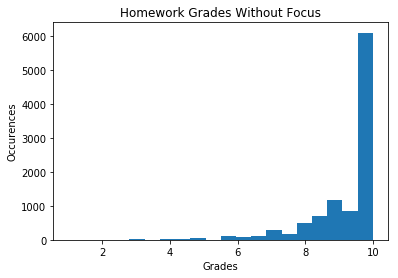

In [127]:
just_make_a_graph_data_maker_results()

In [96]:
data_maker_focus()

making data


mean with a focus on the student's weaknesses 9.184037833782416


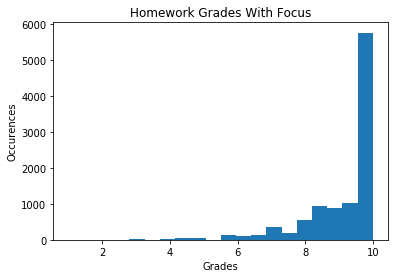

In [128]:
just_make_a_graph_data_maker_results_focus()

mean with all grades 9.232295244283483


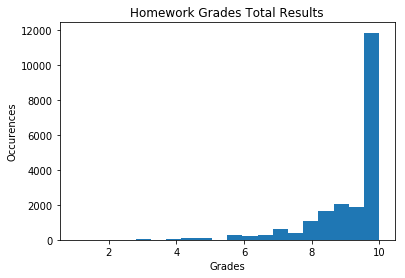

In [129]:
grades_total=get_grades_total()
just_make_a_graph_data_maker_results_total(grades_total)

In [116]:
grades_total=np.array(grades_total)
size=int(len(grades_total)/2)
trials=10**6
grades_mean=9.280552654785483
grades_with_focus_mean=9.184037833782416
mean_diffs=np.empty(trials)
for trial in tqdm(range(trials)):
    sample_1=np.random.choice(grades_total,size,replace=True)
    sample_2=np.random.choice(grades_total,size,replace=True)
    mean_diffs[trial]=np.mean(sample_1)-np.mean(sample_2)
p=np.sum(mean_diffs>=grades_mean-grades_with_focus_mean)
print('p =',p)

p= 0


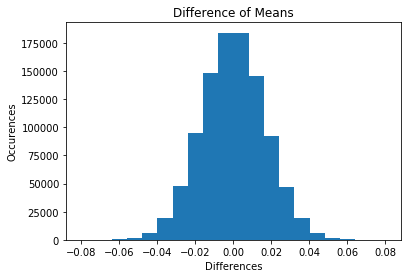

In [117]:
    plt.hist(mean_diffs,bins=20)
    plt.title('Difference of Means')
    plt.xlabel('Differences')
    plt.ylabel('Occurences')
    plt.show()

<h1>Final Homework</h1>

last homework grades for students with focus  9.308804418453546


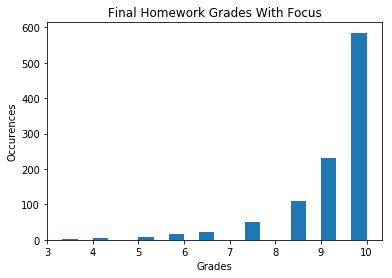

last homework grades for students without focus  9.464749837556854


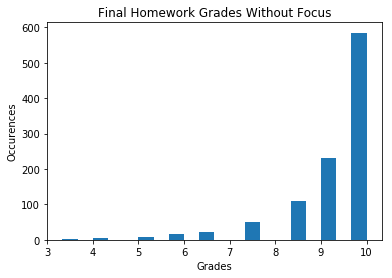

In [130]:
grades_total=[]
grades_without_focus=[]
grades_with_focus=[]
data=data_loader_focus()
students=data[1]
homeworks=data[0]
for email in students.keys():
    grades_with_focus.append(get_grade_focus(students[email],n+1))
    grades_without_focus.append(get_grade(students[email],n+1))
    grades_total.append(get_grade_focus(students[email],n+1))
    grades_total.append(get_grade(students[email],n+1))



print('last homework grades for students with focus ',sum(grades_with_focus)/len(grades_with_focus))
plt.hist(grades_with_focus,bins=20)
plt.title('Final Homework Grades With Focus')
plt.xlabel('Grades')
plt.ylabel('Occurences')
plt.show()

print('last homework grades for students without focus ',sum(grades_without_focus)/len(grades_without_focus))
plt.hist(grades_with_focus,bins=20)
plt.title('Final Homework Grades Without Focus')
plt.xlabel('Grades')
plt.ylabel('Occurences')
plt.show()

In [124]:
trials=10**4
mean_with_focus=np.mean(grades_with_focus)
mean_without_focus=np.mean(grades_without_focus)
mean_diffs=np.empty(trials)
for trial in tqdm(range(trials)):
    sample_1=np.random.choice(grades_total,size,replace=True)
    sample_2=np.random.choice(grades_total,size,replace=True)
    mean_diffs[trial]=np.mean(sample_1)-np.mean(sample_2)
p=np.sum(mean_diffs>=mean_without_focus-mean_with_focus)
print('p=',p)

p= 0
